In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [3]:
data = df.drop('Unnamed: 0', axis=1)

In [4]:
# split into train test sets
train, test = train_test_split(data,test_size=0.2,random_state= 20)

In [5]:
train['arrival_delay_in_minutes'] = train['arrival_delay_in_minutes'].fillna(train['arrival_delay_in_minutes'].median())
test['arrival_delay_in_minutes'] = test['arrival_delay_in_minutes'].fillna(train['arrival_delay_in_minutes'].median())

<ipython-input-5-1696f6cb871a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['arrival_delay_in_minutes'] = train['arrival_delay_in_minutes'].fillna(train['arrival_delay_in_minutes'].median())
<ipython-input-5-1696f6cb871a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arrival_delay_in_minutes'] = test['arrival_delay_in_minutes'].fillna(train['arrival_delay_in_minutes'].median())


In [6]:
train.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [7]:
test.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [8]:
categorical_features =train.select_dtypes(exclude=np.number).columns.to_list()
categorical_features

['Gender', 'customer_type', 'type_of_travel', 'customer_class', 'satisfaction']

In [9]:
train_d = pd.get_dummies(train, columns = categorical_features, drop_first= True)

In [10]:
X_train = train_d.iloc[:,:-1]
Y_train = train_d.iloc[:,-1:]

In [11]:
test_d = pd.get_dummies(test, columns = categorical_features, drop_first= True)

In [12]:
X_test = test_d.iloc[:,:-1]
Y_test = test_d.iloc[:,-1:]

In [13]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [14]:
clf = RidgeClassifier().fit(X_train, Y_train) 

C:\Users\Siumi_lap\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
clf.score(X_train, Y_train)

0.8713716507545427

In [16]:
Ypred = clf.predict(X_test)

In [17]:
clf.score(X_test,Ypred)

1.0

In [18]:
auc = metrics.roc_auc_score(Y_test,Ypred)
auc

0.8682075239979354

In [19]:
clf.get_params()

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [20]:
clf.coef_

array([[-1.90570299e-03,  1.52800962e-06,  1.37044674e-01,
        -3.46882905e-02, -8.09000436e-02,  5.95289000e-03,
        -9.88160354e-03,  1.58454428e-01,  1.75170869e-02,
         3.02403005e-02,  7.00884395e-02,  6.50176099e-02,
         3.20477266e-02,  7.51174598e-02,  3.08856769e-02,
         5.18768197e-02,  1.05292936e-03, -2.07011026e-03,
         2.08967561e-02, -6.16401518e-01, -7.62150840e-01,
        -2.46734031e-01, -2.75107601e-01]])

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [23]:
print(confusion_matrix(Y_test,Ypred))
print(classification_report(Y_test,Ypred))

[[13255  1474]
 [ 1839  9408]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14729
           1       0.86      0.84      0.85     11247

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [24]:
#false positive rate and true positive rate
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(Y_test,Ypred)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)
roc_auc_ridge

0.8682075239979354

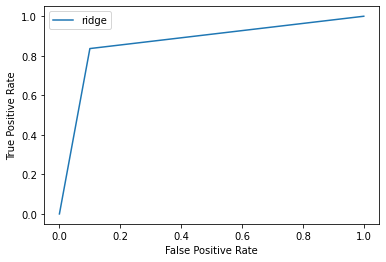

In [27]:
# plot the roc curve for the  random forest model
plt.plot(fpr_ridge, tpr_ridge, label='ridge')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [28]:
clf.intercept_

array([-1.38312906])

In [29]:
coefficients = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf.coef_[0]})
coefficients

,Feature,Coefficients
0,age,-0.001906
1,flight_distance,0.000002
2,inflight_wifi_service,0.137045
3,departure_arrival_time_convenient,-0.034688
4,ease_of_online_booking,-0.080900
5,gate_location,0.005953
6,food_and_drink,-0.009882
7,online_boarding,0.158454
8,seat_comfort,0.017517
9,inflight_entertainment,0.030240
